In [140]:
#Datasets are split into training, validation and test set excluding the year 2020.
#2nd half of 2019 is the test set, first half of 2019 is the validation set while data before 2019 is the training set.

<h1>Import Libraries<h1>

In [141]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from datetime import datetime,date,time, timedelta


<h1> Define Functions<h1>

In [142]:
#Predictive function using moving average
#df is the dataframe used for prediction
#target column
#N number of windows used for moving average 
#minimum value for prediction to make sure prediction does not go below zero
#offset for picking out predicted values only for validation set and test set

def predict_mov_avg(df, target_col, N, pred_min, offset):
     pred_list = df[target_col].rolling(window = N, min_periods=1).mean()#rolling mean function for moving average
     pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))#Adding one timestep to list of predicted values
     pred_list = np.array(pred_list)
     pred_list[pred_list < pred_min] = pred_min
     return pred_list[offset:]


#Mean absolute percentage error function    
def mape(y_test,y_pred):
    y_test, y_pred= np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100


#Root Mean Square Error function
def rmse(y_test,y_pred):
    y_test, y_pred=np.array(y_test), np.array(y_pred)
    return np.sqrt(((y_pred-y_test)**2).mean())

<h1>Loading of Dataset<h1>

In [144]:
df= pd.read_csv("Yahoo.csv")
print(df.shape)
print(df.head)

(1218, 8)
<bound method NDFrame.head of       Unnamed: 0         Date    Open    High     Low   Close  AdjClose  \
0              0  31 Dec 2019  1.0100  1.0100  1.0000  1.0000    1.0000   
1              1  30 Dec 2019  1.0100  1.0100  1.0000  1.0100    1.0100   
2              2  27 Dec 2019  1.0000  1.0100  1.0000  1.0100    1.0100   
3              3  26 Dec 2019  1.0100  1.0100  1.0000  1.0000    1.0000   
4              4  24 Dec 2019  1.0000  1.0100  1.0000  1.0100    1.0100   
5              5  23 Dec 2019  0.9800  1.0000  0.9800  1.0000    1.0000   
6              6  20 Dec 2019  0.9750  0.9800  0.9700  0.9750    0.9750   
7              7  19 Dec 2019  0.9750  0.9750  0.9650  0.9700    0.9700   
8              8  18 Dec 2019  0.9800  0.9800  0.9650  0.9750    0.9750   
9              9  17 Dec 2019  0.9850  1.0100  0.9800  0.9800    0.9800   
10            10  16 Dec 2019  0.9900  0.9900  0.9800  0.9800    0.9800   
11            11  13 Dec 2019  0.9850  0.9900  0.9750  0.990

<h1> Splitting of dataset into training, validation and test sets<h1>

                 Date AdjClose
Date                          
2015-01-02 2015-01-02   1.1668
2015-01-05 2015-01-05   1.1697
2015-01-06 2015-01-06   1.1697
2015-01-07 2015-01-07   1.1519
2015-01-08 2015-01-08   1.1429
2015-01-09 2015-01-09   1.1519
2015-01-12 2015-01-12   1.1459
2015-01-13 2015-01-13   1.1459
2015-01-14 2015-01-14   1.1459
2015-01-15 2015-01-15   1.1429
                 Date AdjClose
Date                          
2019-01-02 2019-01-02   1.0733
2019-01-03 2019-01-03   1.0635
2019-01-04 2019-01-04   1.0635
2019-01-07 2019-01-07   1.0733
2019-01-08 2019-01-08   1.0733
2019-01-09 2019-01-09   1.1123
2019-01-10 2019-01-10   1.1221
2019-01-11 2019-01-11   1.1318
2019-01-14 2019-01-14   1.1221
2019-01-15 2019-01-15   1.1318
                 Date AdjClose
Date                          
2019-07-04 2019-07-04   1.0448
2019-07-05 2019-07-05   1.0349
2019-07-08 2019-07-08   1.0448
2019-07-09 2019-07-09   1.0448
2019-07-10 2019-07-10   1.0448
2019-07-11 2019-07-11   1.0349
2019-07-

Text(0, 0.5, 'Price')

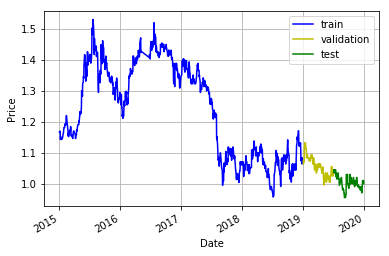

In [146]:
#Training set consists of data before 2019
#Validation set consists of data from first half of 2019
#Test set consists of data from second half of 2019

train_set = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])
valid_set = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])
test_set  = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'AdjClose'])


for i in range(0,len(df)):
    if "2019" in df['Date'][i]:
        valid_set['Date'][i] = df['Date'][i]
        valid_set['AdjClose'][i]= df['AdjClose'][i]
    else:
        train_set['Date'][i] = df['Date'][i]
        train_set['AdjClose'][i]= df['AdjClose'][i]

#Remove missing values from datasets
train_set.dropna(subset=["Date"],inplace=True)
valid_set.dropna(subset=["Date"],inplace=True)

#Splitting of 2019 data into validation and test sets
test_set=valid_set[:int(valid_set.shape[0]/2)]
valid_set=valid_set[int(valid_set.shape[0]/2):]

#Convert dates to datetime values and sort them based on ascending order
train_set['Date']=pd.to_datetime(train_set.Date)
valid_set['Date']=pd.to_datetime(valid_set.Date)
test_set['Date']=pd.to_datetime(test_set.Date)
train_set.index=train_set['Date']
valid_set.index=valid_set['Date']
test_set.index=test_set['Date']
train_data=train_set.sort_index(ascending=True,axis=0)
valid_data=valid_set.sort_index(ascending=True,axis=0)
test_data=test_set.sort_index(ascending=True,axis=0)
#print(train_data.shape[0])
#print(valid_data.shape[0])
#print(test_data.shape[0])
#print(train_data.head(10))
#print(valid_data.head(10))
#print(test_data.head(10))

#Make a dataframe consisting of training and validation set for use later
train_valid_df=pd.concat([train_data,valid_data],ignore_index=True)
train_valid_df['Date']=pd.to_datetime(train_valid_df.Date)


#Make a dataframe consisting of all sets with only the columns 'Date' and 'AdjClose' for later
total_data=pd.concat([train_data,valid_data,test_data],ignore_index=True)
total_data['Date']=pd.to_datetime(total_data.Date)

#print(train_valid_df.head(10))
#print(train_valid_df.tail(10))
#print(total_data.head(10))
#print(total_data.tail(10))      

ax = train_data.plot(x='Date', y='AdjClose', style='b-', grid=True)
ax = valid_data.plot(x='Date', y='AdjClose', style='y-', grid=True, ax=ax)
ax = test_data.plot(x='Date', y='AdjClose', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("Date")
ax.set_ylabel("Price")

<h1>Optimization of N value for moving average<h1>

C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


(2, 968)

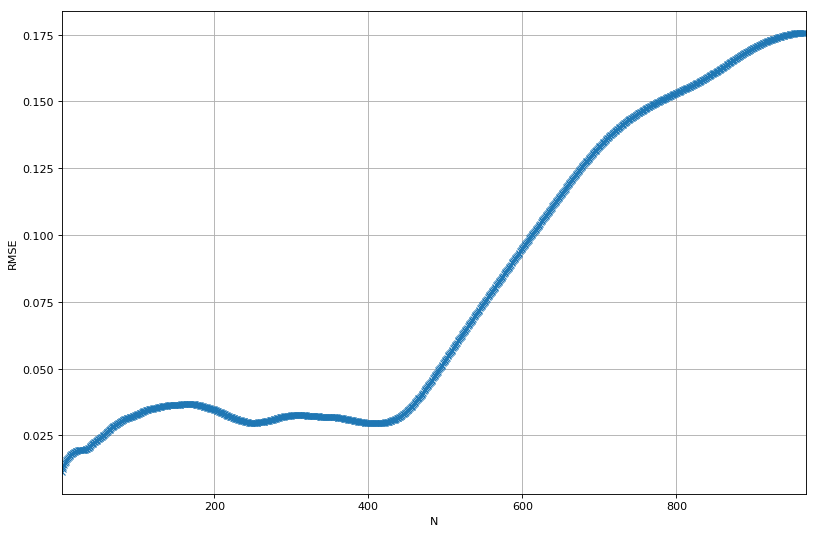

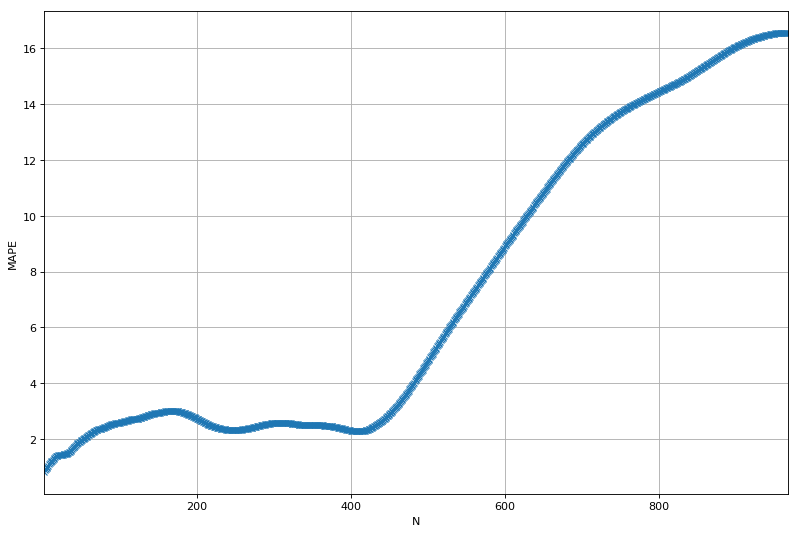

In [148]:
#Create empty lists for containing of RMSE and MAPE values
RMSE=[]
MAPE=[]

#Predict stock prices for validation set and calculate RMSE and MAPE for each N
for N in range(2, train_data.shape[0]):#N starts from 2 since we are using the moving average method which requires N>1
    pred_valid=predict_mov_avg(train_valid_df, 'AdjClose', N, 0, train_data.shape[0])
    valid_data.loc[:,'Pred_valid'+str(N)]=pred_valid
    RMSE.append(rmse(valid_data['AdjClose'],pred_valid))
    MAPE.append(mape(valid_data['AdjClose'],pred_valid))


#Plot RMSE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, train_data.shape[0]])


#Plot MAPE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, train_data.shape[0]])


(0.011, 0.018)

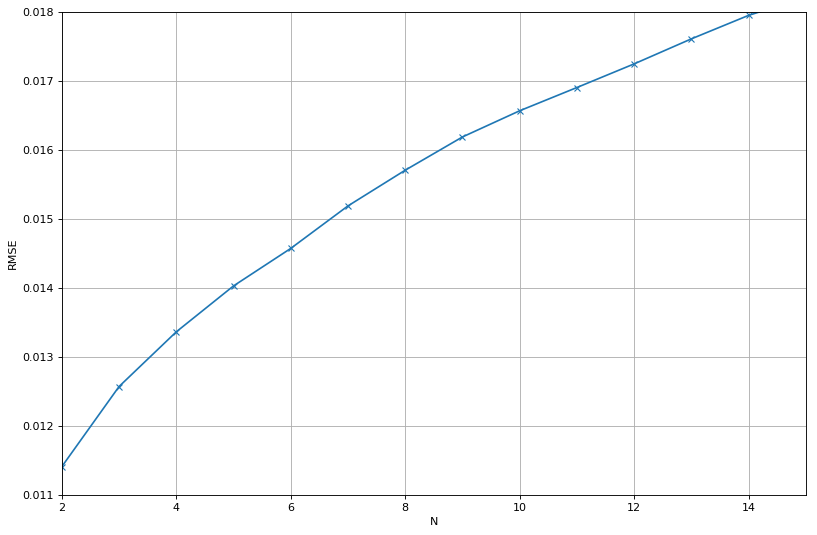

In [149]:
#Zoom in on graphs

#Plot RMSE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2,15])
plt.ylim(0.011,0.018)

(0.75, 1.3)

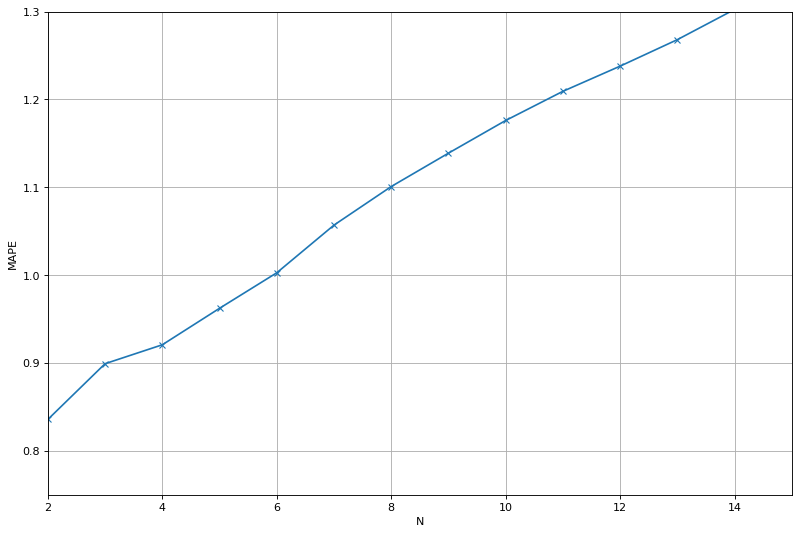

In [150]:
#Plot MAPE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 15])
plt.ylim(0.75,1.3)

In [151]:
#From graph, it is clear that RMSE and MAPE is the lowest when N=2, N=2 chosen for model
Optimized_N=2 

pred_valid=predict_mov_avg(train_valid_df, 'AdjClose', Optimized_N, 0, train_data.shape[0])
valid_data.loc[:,'Pred_valid'+str(Optimized_N)]=pred_valid
print("RMSE=",rmse(valid_data['AdjClose'],pred_valid))
print("MAPE=",mape(valid_data['AdjClose'],pred_valid),"%")


ax1 = valid_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax);
ax1 = valid_data.plot(x='Date', y='Pred_valid2',style='gx-',grid=True, ax=ax);
ax1.legend(['validation', 'predictions with N=2'])
ax1.set_xlabel("Date")
ax1.set_ylabel("SGD")
ax1.set_xlim([date(2019,1,2),date(2019,7,3)])
ax1.set_ylim(0.98,1.14)


RMSE= 0.011408253152871207
MAPE= 0.8357407682589527 %


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


(0.98, 1.14)

(0.0296, 0.0299)

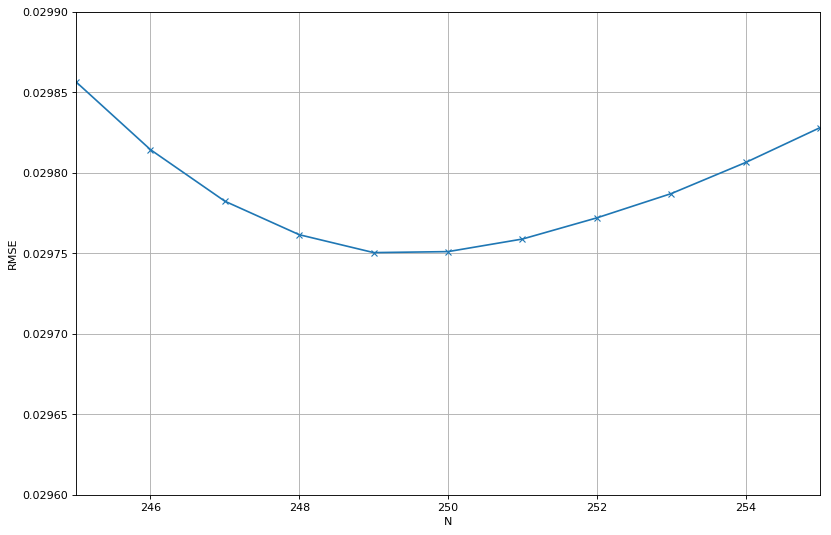

In [152]:
#Zoom in on graphs at the next minimum point

#Plot RMSE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([245,255])
plt.ylim(0.0296,0.0299)

(2.31, 2.33)

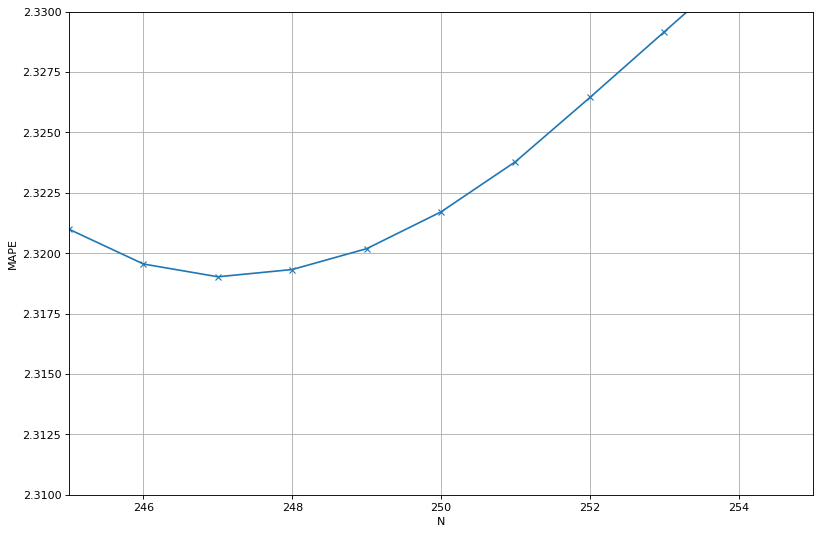

In [153]:
#Plot MAPE
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(2, train_data.shape[0]), MAPE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([245, 255])
plt.ylim(2.31,2.33)

In [154]:
#From graph, it is clear that the next lowest RMSE and MAPE apart from N=2 is around N=248, therefore N=248 is chosen.
Optimized_N=248 

pred_valid=predict_mov_avg(train_valid_df, 'AdjClose', Optimized_N, 0, train_data.shape[0])
valid_data.loc[:,'Pred_valid'+str(Optimized_N)]=pred_valid
print("RMSE=",rmse(valid_data['AdjClose'],pred_valid))
print("MAPE=",mape(valid_data['AdjClose'],pred_valid),"%")


ax1 = valid_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax);
ax1 = valid_data.plot(x='Date', y='Pred_valid248',style='gx-',grid=True, ax=ax);
ax1.legend(['validation', 'predictions with N=248'])
ax1.get_legend().legendHandles[0].set_color('red')
ax1.get_legend().legendHandles[1].set_color('green')
ax1.set_xlabel("Date")
ax1.set_ylabel("SGD")
ax1.set_xlim([date(2019,1,2),date(2019,7,3)])
ax1.set_ylim(0.98,1.14)

RMSE= 0.029761460492518273
MAPE= 2.319323777076842 %


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


(0.98, 1.14)

<h1>Testing of predictive model<h1>

In [155]:
#For N=2
Optimized_N=2
pred_test= predict_mov_avg(total_data, 'AdjClose', Optimized_N, 0, train_data.shape[0]+valid_data.shape[0])
test_data.loc[:,'Pred_test'+'2']=pred_test
print("RMSE=",rmse(test_data['AdjClose'],pred_test))
print("MAPE=",mape(test_data['AdjClose'],pred_test),"%")
print(test_data.tail(10))

ax2 = test_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax)
ax2 = test_data.plot(x='Date', y='Pred_test2',style='gx-',grid=True, ax=ax)
ax2.legend(['test', 'predictions with N=2'])
ax2.get_legend().legendHandles[0].set_color('red')
ax2.get_legend().legendHandles[1].set_color('green')
ax2.set_xlabel("Date")
ax2.set_ylabel("SGD")
ax2.set_xlim([date(2019,7,4),date(2019,12,31)])
ax2.set_ylim(0.92,1.07)

RMSE= 0.011375704813328984
MAPE= 0.7966610006674568 %
                 Date AdjClose  Pred_test2
Date                                      
2019-12-17 2019-12-17     0.98      0.9850
2019-12-18 2019-12-18    0.975      0.9800
2019-12-19 2019-12-19     0.97      0.9775
2019-12-20 2019-12-20    0.975      0.9725
2019-12-23 2019-12-23        1      0.9725
2019-12-24 2019-12-24     1.01      0.9875
2019-12-26 2019-12-26        1      1.0050
2019-12-27 2019-12-27     1.01      1.0050
2019-12-30 2019-12-30     1.01      1.0050
2019-12-31 2019-12-31        1      1.0100


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


(0.92, 1.07)

In [157]:
#For N=248
Optimized_N=248
pred_test= predict_mov_avg(total_data, 'AdjClose', Optimized_N, 0, train_data.shape[0]+valid_data.shape[0])
test_data.loc[:,'Pred_test'+str(Optimized_N)]=pred_test
print("RMSE=",rmse(test_data['AdjClose'],pred_test))
print("MAPE=",mape(test_data['AdjClose'],pred_test),"%")
print(test_data.tail(10))

ax2 = test_data.plot(x= 'Date', y='AdjClose', style='rx-',grid=True, ax=ax)
ax2 = test_data.plot(x='Date', y='Pred_test248',style='gx-',grid=True, ax=ax)
ax2.legend(['test', 'predictions with N=248'])
ax2.get_legend().legendHandles[0].set_color('red')
ax2.get_legend().legendHandles[1].set_color('green')
ax2.set_xlabel("Date")
ax2.set_ylabel("SGD")
ax2.set_xlim([date(2019,7,4),date(2019,12,31)])
ax2.set_ylim(0.92,1.07)

RMSE= 0.05168907712708073
MAPE= 4.818438405664326 %
                 Date AdjClose  Pred_test2  Pred_test248
Date                                                    
2019-12-17 2019-12-17     0.98      0.9850      1.031822
2019-12-18 2019-12-18    0.975      0.9800      1.031406
2019-12-19 2019-12-19     0.97      0.9775      1.031010
2019-12-20 2019-12-20    0.975      0.9725      1.030554
2019-12-23 2019-12-23        1      0.9725      1.030118
2019-12-24 2019-12-24     1.01      0.9875      1.029862
2019-12-26 2019-12-26        1      1.0050      1.029567
2019-12-27 2019-12-27     1.01      1.0050      1.029271
2019-12-30 2019-12-30     1.01      1.0050      1.029016
2019-12-31 2019-12-31        1      1.0100      1.028761


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


(0.92, 1.07)

<h1> 1-day prediction<h1>

In [158]:
#N=2
Optimized_N=2
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])#Make an empty dataframe of size=1
total_data_1=pd.concat([total_data,empty_df],ignore_index=True)
print("1-day prediction=",predict_mov_avg(total_data_1, 'AdjClose', Optimized_N, 0, total_data_1.shape[0]-1)[0])


1-day prediction= 1.0049999999999946


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


In [159]:
#N=248
Optimized_N=248
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])#Make an empty dataframe of size=1
total_data_1=pd.concat([total_data,empty_df],ignore_index=True)
print("1-day prediction=",predict_mov_avg(total_data_1, 'AdjClose', Optimized_N, 0, total_data_1.shape[0]-1)[0])

1-day prediction= 1.0285048387096765


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


<h1>Multiple-day prediction<h1>

In [160]:
#N=2
Optimized_N=2
total_data=pd.concat([train_data,valid_data,test_data],ignore_index=True)
total_data['Date']=pd.to_datetime(total_data.Date)

Days=10
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])
for x in range(Days):
    total_data=pd.concat([total_data,empty_df],ignore_index=True,sort=True)
    total_data.at[total_data.shape[0]-1,'AdjClose']=predict_mov_avg(total_data, 'AdjClose', Optimized_N, 0, total_data.shape[0]-1)[0]
print(total_data['AdjClose'].iloc[-10:]) 

C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


1218      1.005
1219     1.0025
1220    1.00375
1221    1.00312
1222    1.00344
1223    1.00328
1224    1.00336
1225    1.00332
1226    1.00334
1227    1.00333
Name: AdjClose, dtype: object


In [161]:
#N=248
Optimized_N=248
total_data=pd.concat([train_data,valid_data,test_data],ignore_index=True)
total_data['Date']=pd.to_datetime(total_data.Date)

Days=10
empty_df=pd.DataFrame(index=range(1),columns=['Date', 'AdjClose'])
for x in range(Days):
    total_data=pd.concat([total_data,empty_df],ignore_index=True,sort=True)
    total_data.at[total_data.shape[0]-1,'AdjClose']=predict_mov_avg(total_data, 'AdjClose', Optimized_N, 0, total_data.shape[0]-1)[0]
print(total_data['AdjClose'].iloc[-10:]) 

1218     1.0285
1219    1.02836
1220    1.02818
1221      1.028
1222    1.02766
1223    1.02728
1224    1.02686
1225    1.02647
1226    1.02605
1227    1.02566
Name: AdjClose, dtype: object


C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chuat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


# <h1>Analysis of Results<h1>
<ul>
 <li>For a good predictive model, RMSE and MAPE needs to be as low as possible.
 <li>N=2 has a RMSE of 0.0114, MAPE of 0.836% for prediction of prices in validation set.</li>
 <li>N=2 has a RMSE of 0.0114, MAPE of 0.797% for prediction of prices in test set.</li>
 <li>N=2 has the lowest RMSE and MAPE for prediction of prices in validation set.</li>
 <li>Therefore, N=2 is selected.</li>
 <li>N=1 is not considered as using N=1 would mean that our predicted stock price would simply be the stock price
    of the last day in the dataset. No average can be taken since it is only a single day.</li>
 <li>Using this predictive model, a stock pricing of 1.005 SGD is predicted for the next day.</li>
 <li>Multiple-day prediction is also possible, by using the predicted prices for prediction of prices on subsequent
        days.</li>
 <li>However, as seen from the results under the multiple-day prediction section and through simple calculations, it is obvious that the predicted prices converges after around 10 days when using N=2.</li>
 <li>Therefore, the N value at the next minimum point, N=248, is also adopted for the price prediction.</li>
    <li>N=248 has a RMSE of 0.0298, MAPE of 2.32% for prediction of prices in validation set.</li>
    <li>N=248 has a RMSE of 0.0517, MAPE of 4.82% for prediction of prices in test set.</li>
    <li>Using this N value, a stock pricing of 1.0285 SGD is predicted for the next day.</li>
    <li>The RMSE and MAPE values obtained are higher for N=248 compared to N=2, however, the predicted prices converges at a slower rate which is to be expected since the moving average is taken over a much larger number.</li>
    <li>In conclusion, the moving average model can be used for predicting stock prices. However, in general, they tend to be used more for predicting the trends in prices such as uptrends and downtrends.</li>
 </ul>
    